In [62]:
import numpy as np
import matplotlib.pyplot as plt

#atomic units scaling
q = -1 
m = 1

x0 = 0
x0_prime = 0

t = np.linspace(-1, 6, 100)

#defining the acceleration, velocity, and position. Obtained via integration from the newton's eqn of motion
def a(t, tb=1):
    return np.cos(t)

def v(t, tb):
    return (np.sin(t)- np.sin(tb))

def x(t, tb):
    return (-np.cos(t)+np.cos(tb)-np.sin(tb)*(t-tb))



In [63]:
#bisection root finding slightly customised to this problem
def bisection_method(tb, lower, upper, tol=1e-10, max_iter=100):
    if x(upper,tb) * x(lower,tb) > 0: # root existence condition
        raise ValueError("f(a) and f(b) must have opposite signs.")
    iterations = 0
    while abs(upper - lower) > tol and iterations < max_iter:
        mid = (upper + lower) / 2
        
        if x(mid,tb) == 0: # exact root found
            break
        elif x(lower,tb) * x(mid,tb) < 0:
            upper = mid
        else:
            lower = mid
        iterations += 1
    return mid

Birth Time          Return Time         Energy              
------------------------------------------------------------
-1.0                No return                               
-0.8                No return                               
-0.6000000000000001 No return                               
-0.40000000000000013No return                               
-0.20000000000000018No return                               
-2.220446049250313e-16No return                               
0.19999999999999973 4.782174621883314   0.715489447647753   
0.3999999999999997  4.145098392793443   0.7598711823947052  
0.5999999999999996  3.627628039161209   0.5322711197100746  
0.7999999999999996  3.1648455684189685  0.2742492978051928  
0.9999999999999996  2.732355614716653   0.09837340227827347 


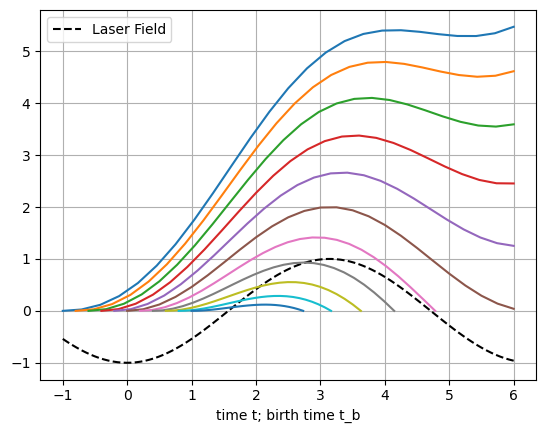

In [70]:
# part 1
tb_range = np.arange(-1, 1.1, 0.2)

plt.plot(t, -np.cos(t),"--k" ,label="Laser Field")
plt.legend()
plt.grid()
plt.xlabel("time t; birth time t_b")




# Calculations for a single value of tb (EXTENDED TO ARRAY HEREAFTER)
# tb= 0.5
# tr = bisection_method(tb, 2,6)
# t_range = np.linspace(tb, tr, 25)
# plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")

print(f"{'Birth Time':<20}{'Return Time':<20}{'Energy':<20}")
print("-" * 60)


for tb in tb_range:
    try:
        tr = bisection_method(tb, 2, 6)
    except:
        # print(f"For tb={tb}, electron does not return ")
        tr = "No return"
        energy = ""
        t_range = np.linspace(tb, 6, 25)
    else:
        # print(tb, tr)
        tr = bisection_method(tb, 2,6)
        t_range = np.linspace(tb, tr, 25)
        energy = 0.5*v(tr,tb)**2
    plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    print(f"{Math.round(tb):<20}{tr:<20}{energy:<20}")
    
    
    # t_range = np.linspace(tb, 6, 25)
    # plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    
    
    


Parts after this consider of the demo/random trials to test algorithm and logic. 
They are NOT a part of the actual source code, and hence should not be considered by anyone other than the creator.

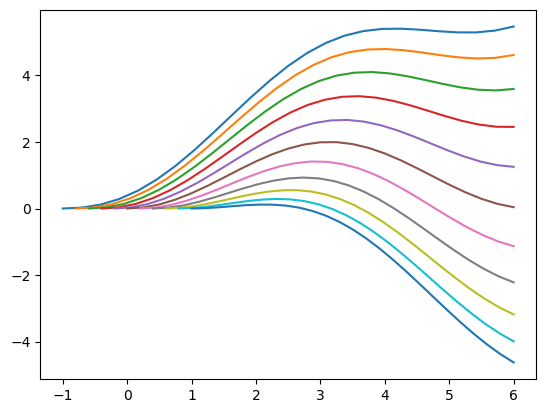

In [65]:
# demo run of trajectories

for tb in tb_range:
    t_range = np.linspace(tb, 6, 25)
    plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")